# Coding the galaxy star spectrum evolution
We need to define an *ensemble* and discretize it in bins. For this ensemble we build an array, and divide it in **bins**.<br>
This array will have a number of bins and their size $\Delta M$, then it will range from the minimum mass for a MS star ($\approx 0.01 M_\odot$) and this value will remain constant with thime, while the $M_\text{max} = M_\text{max}(t)$  and we expect $M_\text{max}(t_0) < M_\text{max}(t_1)$.<br>
Now to build our spectrum we need to sum over all single BB spectrum of each star, that is for each bin. The idea is the following

### Assumptions
- No star formation after time $t = 0$, these are **single burst**, 
- $M_\text{min} = 0.1 M_\odot$ constant
- $M_\text{max} (t= 0) = 200 M_\odot$
- Initial mass function for the number of stars at each time $\dfrac{dN}{dM}(t = 0) \propto M^{-2.35}$, we decide to use the *Salpeter initial mass function* but you can try other inputs.

```
def spmodel(age_gal , ..):
    for mass in massarray:
        if mass_max_age (cond. age_galaxy):     # i have a certain age of the galaxy, which mass should i
                                                # have?
            compute_bb_spectrum(N_stars, L(M))  # L(M) is the luminosity of each star, 
                                                # the number of stars depends on the initial mass function
            normalize_spectrum()
            sum_BB()
            
    return integrated_spectrum
```

The population must be distributed as the salpeter initial mass function, you generate your array of bins following the mass distribution.

And then i need a driver, i set the time (t = 1) then i do `call spmodel(t, color = blue)` and plot it, and also `call spmodel(t, color = blue)`, the age of the galaxy will range from a value of 0 to 14 $\text{Gyr}$.<br>
We call it `spmodel` because it stands for *simple population model*, but you can use different populations and test for multiple populations.<br>

**Each time you write a line of code test it!**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.modeling.models import BlackBody

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

/home/sam/miniconda3/lib/python3.10/site-packages/astropy/units/quantity.py:673: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


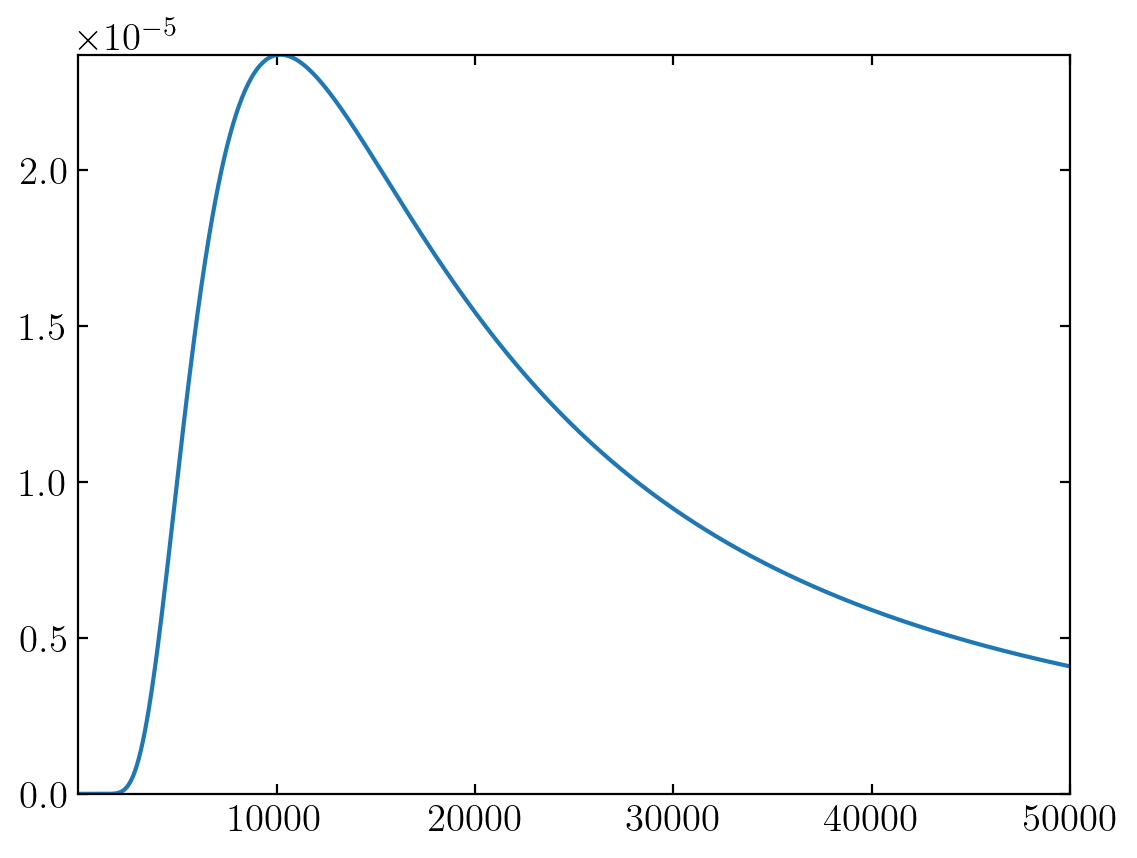

In [71]:
bb = BlackBody(temperature=5000*u.K)
lambd = np.linspace(1 ,int(5e4), 1000)
plt.plot(lambd, bb(lambd * u.AA));

We need the lifetime of the star, we find that $\tau \sim M^{-2}$

In [225]:
def spmodel(m_arr, nstars, lambd, age_g):
    bb_arr = np.array([])
    bb_tot = 0
    
    for m in m_arr:
        T = 5780*(m**0.5)
        L = m**3
        nstars = m**(-2.35)
        lifetime_s = m/L
        
        if age_g <= lifetime_s:
            b0 = BlackBody(temperature=T*u.K, scale = 1.*u.erg/(u.cm**2 * u.AA * u.s * u.sr))
            bb = L*nstars*b0(lambd * u.AA)/(b0.bolometric_flux.value)
            bb_tot += bb
            
    return bb_tot/bb_tot[lambd == 5500]

In [226]:
m_min = 0.1
m_max = 100
nbin = 1000
xi_0 = 1 # density of stars in galaxy

m_arr = np.linspace(m_min, m_max, nbin)

The peak of the spectrum is at 6060 K


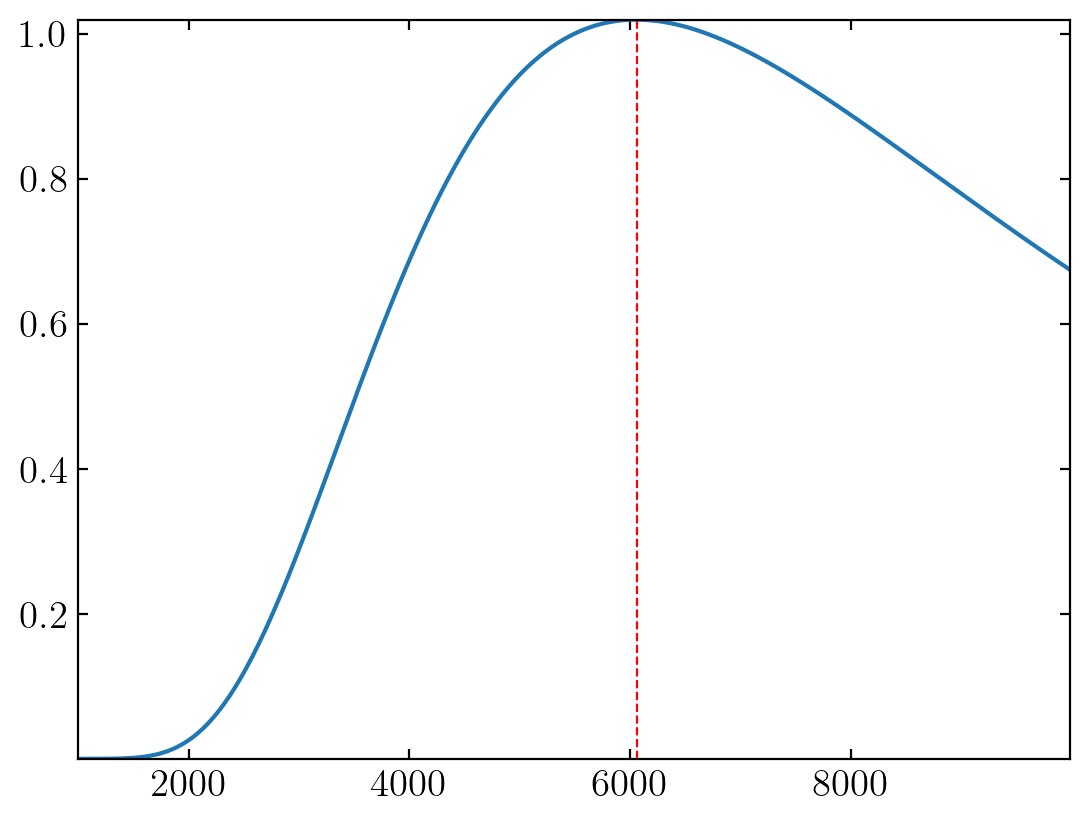

In [227]:
lambd = np.arange(int(1e3) ,int(1e4), 10)
y = spmodel(m_arr, nstars, lambd, 1)

plt.plot(lambd, y)
max_l = lambd[np.argmax(y)]
plt.axvline(max_l, color = 'red', linestyle = 'dashed', lw = .8);

print('The peak of the spectrum is at', max_l, 'K')

  0%|          | 0/10 [00:00<?, ?it/s]

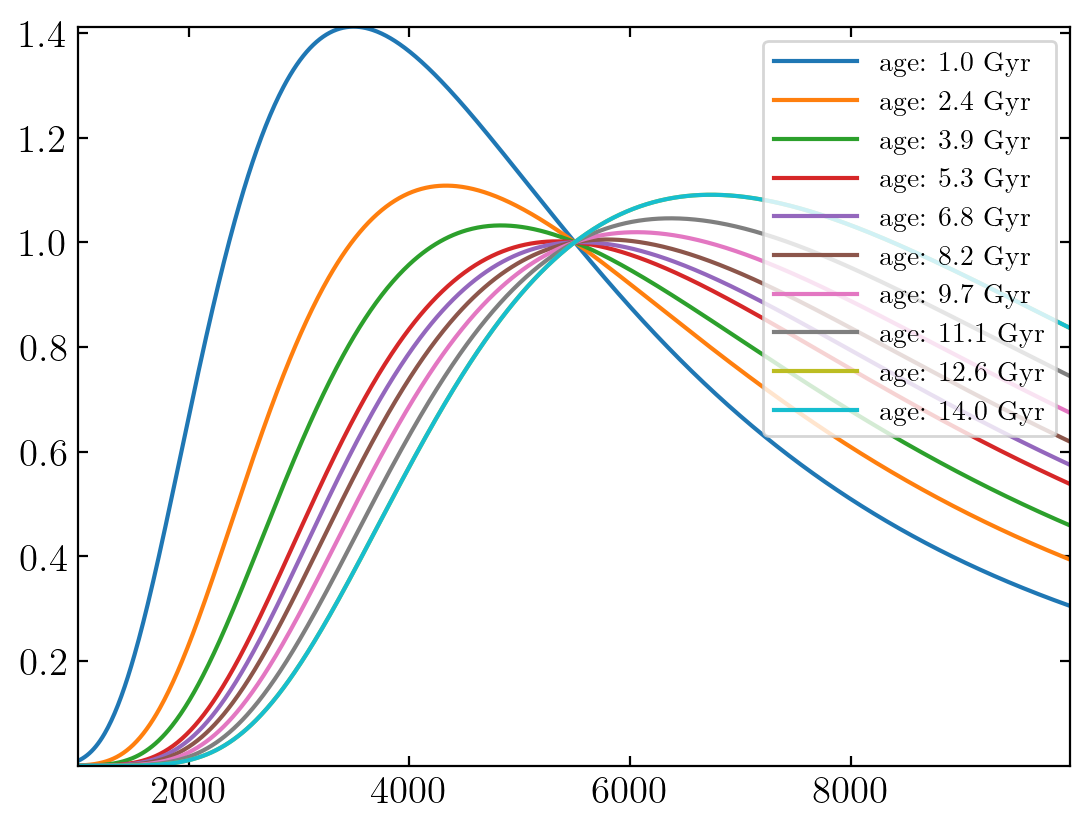

In [228]:
from tqdm.notebook import tqdm

lambd = np.arange(int(1e3), int(1e4), 10)
age_arr = np.linspace(0.1, 1.4, 10)
# the age is normalized to the age of the sun, which is 10 Gyr


for t in tqdm(age_arr):
    y = spmodel(m_arr, nstars, lambd, t)
    plt.plot(lambd, y, label = f'age: {round(t*10,1)} Gyr')
    
plt.legend(loc = 'upper right', fontsize = 10);

G1 is 1.9 $\text{Gyr}$ old. <br>
G2 is 3 $\text{Gyr}$ old. <br>
G3 is 10 $\text{Gyr}$ old. <br>